In [5]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import re
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [6]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kondu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [23]:
data = pd.read_csv("C:/Users/kondu/Downloads/flipkart_data.csv")
data.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [24]:
data.isnull().sum()

review    0
rating    0
dtype: int64

In [25]:
# unique ratings
pd.unique(data['rating'])

array([5, 4, 1, 3, 2])

<Axes: xlabel='rating', ylabel='count'>

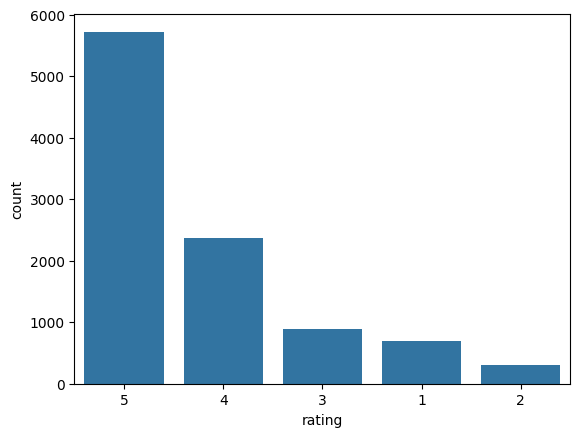

In [26]:
sns.countplot(data=data,
			x='rating',
			order=data.rating.value_counts().index)

In [52]:
reduced_positive_df = df[df['rating'] == 5].sample(n=1700, random_state=42)
# Keep all other ratings as they are
other_ratings_df = df[df['rating'] != 5]

# Combine the reduced rating 5 rows with the other ratings
balanced_df = pd.concat([reduced_positive_df, other_ratings_df], ignore_index=True)

# Save the new dataset
balanced_df.to_csv("reduced_rating5_dataset.csv", index=False)
print("Dataset with reduced rows for rating 5 saved!")

Dataset with reduced rows for rating 5 saved!


Adding new feature "label"

In [7]:
data = pd.read_csv("C:/Users/kondu/OneDrive/Desktop/reduced_rating5_dataset.csv")
data = data.reset_index(drop=True)

In [8]:
# Count the number of reviews for each rating
rating_counts = data['rating'].value_counts()

# Print the number of reviews for each rating
print("Number of reviews for each rating:")
print(rating_counts)


Number of reviews for each rating:
rating
4    1787
5    1700
3     724
1     622
2     272
Name: count, dtype: int64


rating 5:1700  rating 4:1787 rating(1,2,3):1618

In [9]:
# Reset the index to ensure continuous indexing
data = data.reset_index(drop=True)

# Initialize an empty list for labels
pos_neg = []

# Iterate through the ratings in the 'rating' column
for i in range(len(data['rating'])):
    if data['rating'][i] == 5:
        pos_neg.append(1)  # Positive
    elif data['rating'][i] == 4:
        pos_neg.append(0)  # Neutral
    else:
        pos_neg.append(-1)  # Negative (for ratings 3, 2, 1)

# Add the labels as a new column in the DataFrame
data['label'] = pos_neg


In [10]:
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
from tqdm import tqdm
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def preprocess_text(text_data):
    preprocessed_text = []
    for sentence in tqdm(text_data):
        # Removing punctuations
        sentence = re.sub(r'[^\w\s]', '', sentence)
        # Converting lowercase and removing stopwords
        sentence = ' '.join(
            lemmatizer.lemmatize(token.lower()) 
            for token in nltk.word_tokenize(sentence) 
            if token not in stopwords.words('english')
        )
        preprocessed_text.append(sentence)
    return preprocessed_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kondu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kondu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [11]:
preprocessed_review = preprocess_text(data['review'].values)
data['review'] = preprocessed_review

  0%|          | 0/5105 [00:00<?, ?it/s]

100%|██████████| 5105/5105 [00:11<00:00, 452.25it/s]


In [12]:
data.head()

,review,rating,label
0,good buy 999 rupeesread,5,1
1,best priceread,5,1
2,osm productbuild quality little bit unsatisfie...,5,1
3,good product read,5,1
4,nice headphone good qualityread,5,1


In [13]:
data["label"].value_counts()

label
 0    1787
 1    1700
-1    1618
Name: count, dtype: int64

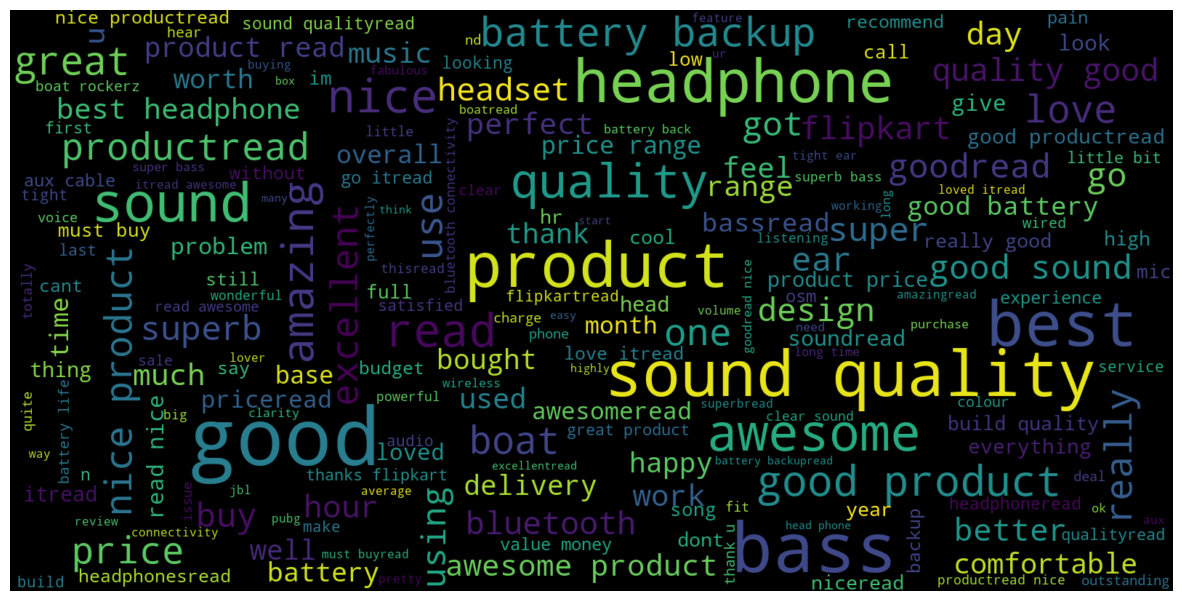

In [14]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == 1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

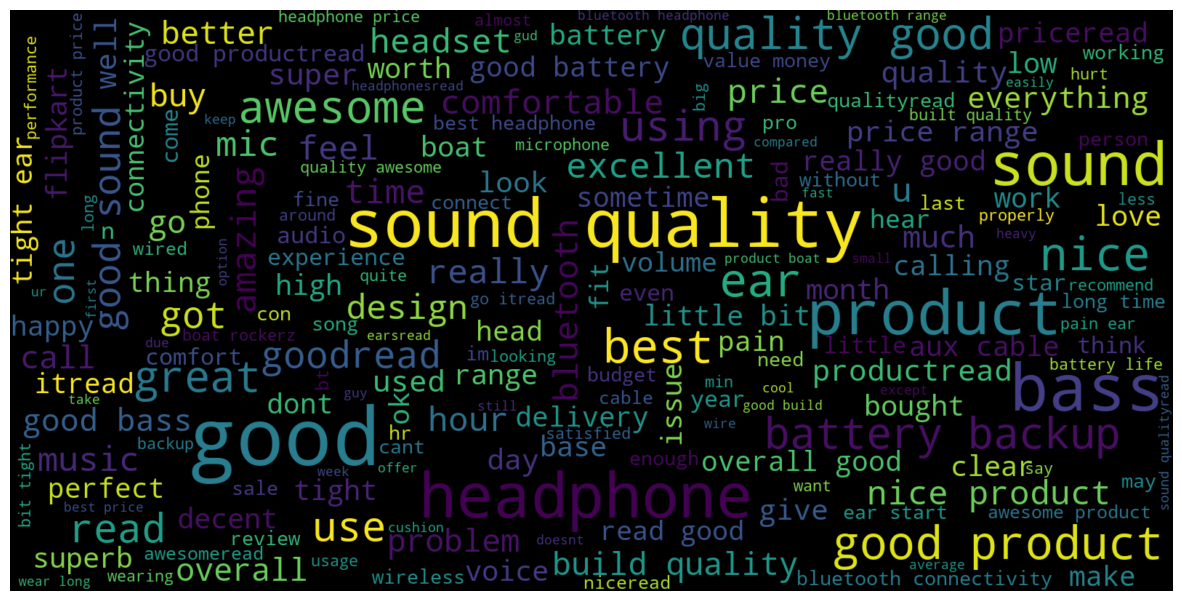

In [15]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == 0].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [16]:
# Check how many negative reviews exist
print(data[data['label'] == -1].shape)


(1618, 3)


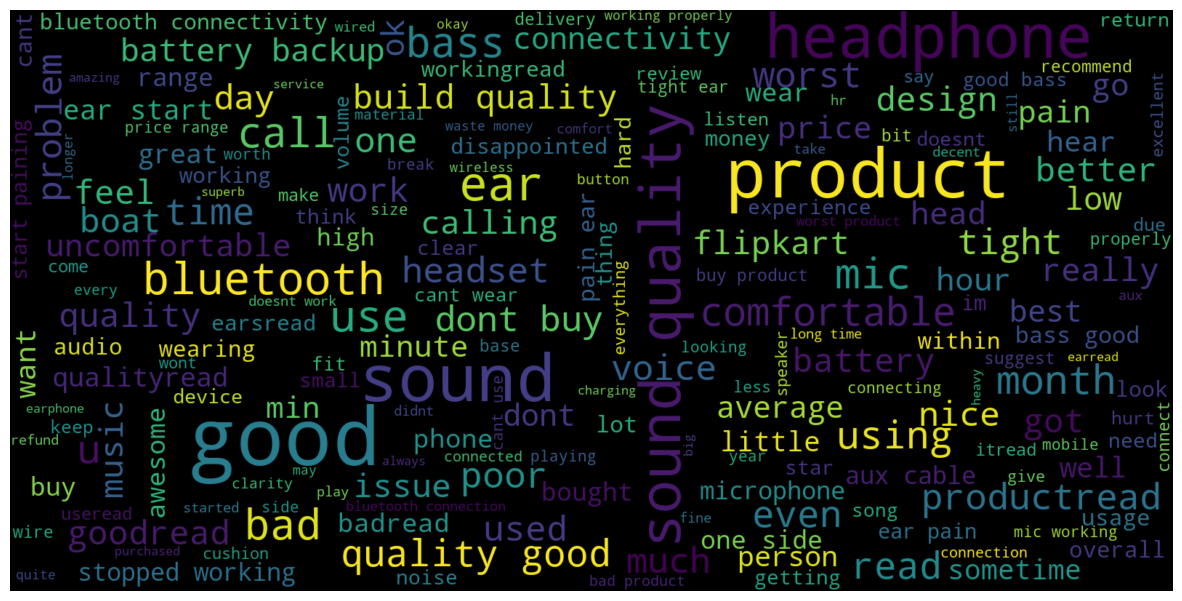

In [17]:
consolidated = ' '.join(
	word for word in data['review'][data['label'] == -1].astype(str))
wordCloud = WordCloud(width=1600, height=800,
					random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated), interpolation='bilinear')
plt.axis('off')
plt.show()

In [18]:
# Count the number of reviews for each rating
rating_counts = data['rating'].value_counts()

# Print the number of reviews for each rating
print("Number of reviews for each rating:")
print(rating_counts)


Number of reviews for each rating:
rating
4    1787
5    1700
3     724
1     622
2     272
Name: count, dtype: int64


In [19]:
# \Modify TF-IDF to use bigrams or trigrams
cv = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))  # (1,2) for unigrams and bigrams
X = cv.fit_transform(data['review']).toarray()



In [20]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, data['label'],
													test_size=0.33,
													stratify=data['label'],
													random_state = 42)

Decison Tree Classifier 

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))

0.9611111111111111


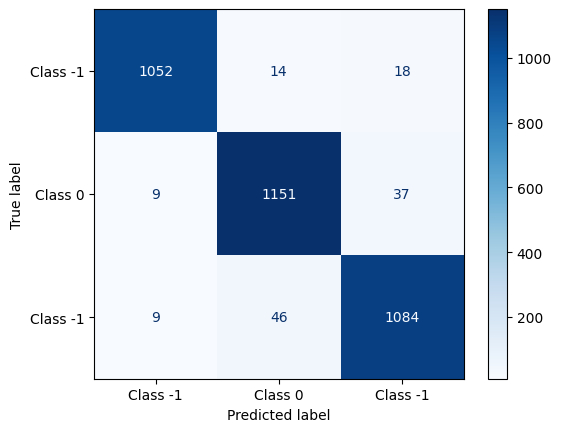

In [23]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Assuming y_train are the true labels and pred are the predicted labels
cm = confusion_matrix(y_train, pred)

# If you have more than 2 classes, specify the correct labels for all classes
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,
                                            display_labels=['Class -1', 'Class 0', 'Class -1'])

cm_display.plot(cmap='Blues')  # You can use any colormap you prefer
plt.show()


Testing

In [24]:
import re
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK stopwords if not already done
nltk.download('stopwords')

# Preprocessing function for new input text
def preprocess_text(text):
    # Remove punctuation and tokenize words
    text = re.sub(r'[^\w\s]', '', text) 
    text = ' '.join(token.lower() 
                    for token in nltk.word_tokenize(text) 
                    if token not in stopwords.words('english')
                    ) 
    return text

# Function to predict sentiment for a new review
def predict_sentiment(review, model, tfidf_vectorizer):
    # Preprocess the input review text
    processed_review = preprocess_text(review)
    
    # Transform the text using the same TF-IDF vectorizer that was used during training
    transformed_review = tfidf_vectorizer.transform([processed_review]).toarray()

    # Use the trained model to predict the sentiment (1 for positive, 0 for negative)
    prediction = model.predict(transformed_review)

    # Return the prediction as "Positive" or "Negative"
    if prediction == 1:
        return "Positive Review"
    elif prediction == -1:
        return "Negative Review"
    else:
        return "Neutral Review"

# Example usage: Predicting a new review
new_review = "awesome quality"
result = predict_sentiment(new_review, model, cv)
print(f"Review: '{new_review}'\nPrediction: {result}")


Review: 'awesome quality'
Prediction: Positive Review


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kondu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Using LogisticRegression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model =  LogisticRegression(random_state=0)
model.fit(X_train,y_train)

#testing the model
pred = model.predict(X_train)
print(accuracy_score(y_train,pred))


0.7798245614035088


Using SVM and RandomForest Classifier

In [31]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Instantiate the SVM model
model = SVC(kernel='linear', random_state=42)

# Train the model
model.fit(X_train, y_train)

# Predict on the training data
train_pred = model.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, train_pred)
print("Training Accuracy for SVM:", training_accuracy)



Training Accuracy for SVM: 0.7795321637426901


In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Instantiate the Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # 100 trees, fixed random state

# Train the model
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, test_pred))



Test Accuracy: 0.5732937685459941
